<a href="https://colab.research.google.com/github/jlonge4/gen_ai_utils/blob/main/phi3_rag_relevance_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets accelerate peft bitsandbytes trl flash-attn arize-phoenix-evals

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 87.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43

In [2]:
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM

config = PeftConfig.from_pretrained("Jlonge4/phi3-rag-relevance-judge")
base_model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct")
model_peft = PeftModel.from_pretrained(base_model, "Jlonge4/phi3-rag-relevance-judge", config=config)

merged_model = model_peft.merge_and_unload()
merged_model.to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


adapter_config.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/25.2M [00:00<?, ?B/s]

Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
          (rotary_emb): Phi3RotaryEmbedding()
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm()
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
        (post_attention_layernorm): Phi3RMSNorm()
      )
    )
    (norm): Phi3RMSNorm()
  )
  (lm_head): Linear(in_features=3072, out_features=3206

In [9]:
# Use a pipeline as a high-level helper
from peft import PeftModel, PeftConfig
from transformers import pipeline
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# base_model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct")
# model_peft = PeftModel.from_pretrained(base_model, "Jlonge4/outputs")
# model_id = "Jlonge4/phi3-rag-relevance-judge-merge"
# # model_id = "microsoft/Phi-3-mini-4k-instruct"
tokenizer_id = "microsoft/Phi-3-mini-4k-instruct"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
# base_model = AutoModelForCausalLM.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
import os
from getpass import getpass

import matplotlib.pyplot as plt
import pandas as pd
from phoenix.evals import (
    RAG_RELEVANCY_PROMPT_RAILS_MAP,
    RAG_RELEVANCY_PROMPT_TEMPLATE,
    OpenAIModel,
    download_benchmark_dataset,
    llm_classify,
)
from sklearn.metrics import classification_report

pd.set_option("display.max_colwidth", None)

df = download_benchmark_dataset(
    task="binary-relevance-classification", dataset_name="wiki_qa-train"
)
df.head()

,query_id,query_text,document_title,document_text,document_text_with_emphasis,relevant
0,Q1,how are glacier caves formed?,Glacier cave,"A partly submerged glacier cave on Perito Moreno Glacier . The ice facade is approximately 60 m high Ice formations in the Titlis glacier cave A glacier cave is a cave formed within the ice of a glacier . Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.","A partly submerged glacier cave on Perito Moreno Glacier . The ice facade is approximately 60 m high Ice formations in the Titlis glacier cave A GLACIER CAVE IS A CAVE FORMED WITHIN THE ICE OF A GLACIER . Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.",True
1,Q10,how an outdoor wood boiler works,Outdoor wood-fired boiler,The outdoor wood boiler is a variant of the classic wood stove adapted for set-up outdoors while still transferring the heat to interior buildings.,The outdoor wood boiler is a variant of the classic wood stove adapted for set-up outdoors while still transferring the heat to interior buildings.,False
2,Q100,what happens to the light independent reactions of photosynthesis?,Light-independent reactions,"The simplified internal structure of a chloroplast Overview of the Calvin cycle and carbon fixation The light-independent reactions of photosynthesis are chemical reactions that convert carbon dioxide and other compounds into glucose . These reactions occur in the stroma , the fluid-filled area of a chloroplast outside of the thylakoid membranes. These reactions take the light-dependent reactions and perform further chemical processes on them. There are three phases to the light-independent reactions, collectively called the Calvin cycle : carbon fixation, reduction reactions, and ribulose 1,5-bisphosphate (RuBP) regeneration. Despite its name, this process occurs only when light is available. Plants do not carry out the Calvin cycle by night. They, instead, release sucrose into the phloem from their starch reserves. This process happens when light is available independent of the kind of photosynthesis ( C3 carbon fixation , C4 carbon fixation , and Crassulacean Acid Metabolism ); CAM plants store malic acid in their vacuoles every night and release it by day in order to make this process work.","The simplified internal structure of a chloroplast Overview of the Calvin cycle and carbon fixation THE LIGHT-INDEPENDENT REACTIONS OF PHOTOSYNTHESIS ARE CHEMICAL REACTIONS THAT CONVERT CARBON DIOXIDE AND OTHER COMPOUNDS INTO GLUCOSE . These reactions occur in the stroma , the fluid-filled area of a chloroplast outside of the thylakoid membranes. THESE REACTIONS TAKE THE LIGHT-DEPENDENT REACTIONS AND PERFORM FURTHER CHEMICAL PROCESSES ON THEM. There are three phases to the light-independent reactions, collectively called the Calvin cycle : carbon fixation, reduction reactions, and ribulose 1,5-bisphosphate (RuBP) regeneration. Despite its name, this process occurs only when light is available. Plants do not carry out the Calvin cycle by night. They, instead, release sucrose into the phloem from their starch reserves. This process happens when light is available independent of the kind of photosynthesis ( C3 carbon fixation , C4 carbon fixation , and Crassulacean Acid Metabolism ); CAM plants store malic acid in their vacuoles every night and release it by day in order to make this process work.",True
3,Q1000,where in the bible that palestine have no land in jerusalem,Philistines,"The Philistine cities of Gaza, Ashdod, Ashkelon, Ekron, and Gath The Philistines (, , , or ; , Plištim), Pleshet or Peleset, were a people who as part of the Sea Peoples appeared in the southern coastal area of Canaan at the beginning of the Iron Age (circa 1175 BC), most probably from the Aegean region. According to the Bible , they ruled the five city-states (the ""Philistine Pentapolis"") of Gaza , 

In [4]:
test = df[1801:len(df)]
# df_['relevant'] = df_['relevant'].map({False: 'unrelated', True: 'relevant'})
test['relevant'].value_counts()

relevant
False    195
True     122
Name: count, dtype: int64

In [ ]:
test.head()

,query_id,query_text,document_title,document_text,document_text_with_emphasis,relevant
1801,Q590,how is 5 hour glucose tolerance test performed,Glucose tolerance test,"A glucose tolerance test is a medical test in which glucose is given and blood samples taken afterward to determine how quickly it is cleared from the blood. The test is usually used to test for diabetes , insulin resistance , and sometimes reactive hypoglycemia and acromegaly , or rarer disorders of carbohydrate metabolism . In the most commonly performed version of the test, an oral glucose tolerance test (OGTT), a standard dose of glucose is ingested by mouth and blood levels are checked two hours later. Many variations of the GTT have been devised over the years for various purposes, with different standard doses of glucose, different routes of administration, different intervals and durations of sampling, and various substances measured in addition to blood glucose.","A glucose tolerance test is a medical test in which glucose is given and blood samples taken afterward to determine how quickly it is cleared from the blood. The test is usually used to test for diabetes , insulin resistance , and sometimes reactive hypoglycemia and acromegaly , or rarer disorders of carbohydrate metabolism . In the most commonly performed version of the test, an oral glucose tolerance test (OGTT), a standard dose of glucose is ingested by mouth and blood levels are checked two hours later. Many variations of the GTT have been devised over the years for various purposes, with different standard doses of glucose, different routes of administration, different intervals and durations of sampling, and various substances measured in addition to blood glucose.",False
1802,Q592,what about me moving pictures,What About Me (song),"""What About Me"" is a song written by Garry Frost and Frances Swan, first recorded by Australian rock band Moving Pictures from their album Days of Innocence . It was the band's first number-one single in Australia spending six consecutive weeks on the top; there, it was the second-highest selling single of 1982. The success of the song led them to America where it became a hit, reaching #29 on the U.S. Billboard Hot 100 chart. The song stayed in the U.S. charts for such a long time that it managed to make Billboards top 100 Pop Singles of 1983, at #88, a rare feat for a single with such a low peak position. The song made an unusual comeback in 1989, peaking at #46.","""What About Me"" is a song written by Garry Frost and Frances Swan, first recorded by Australian rock band Moving Pictures from their album Days of Innocence . It was the band's first number-one single in Australia spending six consecutive weeks on the top; there, it was the second-highest selling single of 1982. The success of the song led them to America where it became a hit, reaching #29 on the U.S. Billboard Hot 100 chart. The song stayed in the U.S. charts for such a long time that it managed to make Billboards top 100 Pop Singles of 1983, at #88, a rare feat for a single with such a low peak position. The song made an unusual comeback in 1989, peaking at #46.",False
1803,Q593,how many eggs per chicken is expected,Egg (food),"On the left a chicken egg, the egg most commonly eaten by humans , and on the right two quail eggs Eggs are laid by females of many different species, including birds , reptiles , amphibians , and fish , and have been eaten by mankind for thousands of years. Bird and reptile eggs consist of a protective eggshell , albumen ( egg white ), and vitellus ( egg yolk ), contained within various thin membranes. Popular choices for egg consumption are chicken , duck , quail , roe , and caviar , but the egg most often consumed by humans is the chicken egg, by a wide margin. Egg yolks and whole eggs store significant amounts of protein and choline , and are widely used in cookery. Due to their protein content, the United States Department of Agriculture ( USDA ) categorizes eg

In [5]:
def format_input(text, query):
    input = f"""
      You are comparing a reference text to a question and trying to determine if the reference text
  contains information relevant to answering the question. Here is the data:
      [BEGIN DATA]
      ************
      [Question]: {query}
      ************
      [Reference text]: {text}
      ************
      [END DATA]
  Compare the Question above to the Reference text. You must determine whether the Reference text
  contains information that can answer the Question. Please focus on whether the very specific
  question can be answered by the information in the Reference text.
  Your response must be single word, either "relevant" or "unrelated",
  and should not contain any text or characters aside from that word.
  "unrelated" means that the reference text does not contain an answer to the Question.
  "relevant" means the reference text contains an answer to the Question."""
    return input

In [8]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

# text = format_input("I hate you")
# messages = [
#     {"role": "user", "content": text}
# ]

pipe = pipeline(
    "text-generation",
    model=merged_model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 256,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

# output = pipe(messages, **generation_args)
# print(output[0]['generated_text'])

The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'JambaForCausalLM', 'JetMoeForCausalLM', 'LlamaForCausalLM', 'MambaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MixtralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalL

In [ ]:
messages = [
    {"role": "user", "content": 'Why is the sky blue?'}
]
generation_args = {
    "max_new_tokens": 256,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}
output = pipe(messages, **generation_args)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
You are not running the flash-attention implementation, expect numerical differences.


In [ ]:
output[0]['generated_text']

" The sky appears blue to the human eye because of the way Earth's atmosphere scatters sunlight. Sunlight is made up of different colors of light, which are scattered in all directions by the gases and particles in the Earth's atmosphere. Blue light is scattered more than other colors because it travels as shorter, smaller waves. This phenomenon is known as Rayleigh scattering. When we look at the sky away from the sun, we see more scattered blue light, which is why the sky appears blue during the day."

In [11]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM

def run_merged_model(text, query):
  input = format_input(query, text)
  messages = [
      {"role": "user", "content": input}
  ]

  pipe = pipeline(
      "text-generation",
      model=merged_model,
      tokenizer=tokenizer,
  )

  generation_args = {
      "max_new_tokens": 4,
      "return_full_text": False,
      "temperature": 0.01,
      "do_sample": True,
  }

  output = pipe(messages, **generation_args)
  torch.cuda.empty_cache()
  return output[0]['generated_text'].strip().lower()

In [7]:
import pandas as pd
df_0 = test[test['relevant'] == True]
df_1 = test[test['relevant'] == False]

# Get 100 samples from each class
df_0_test = df_0.sample(n=100, random_state=42)
df_1_test = df_1.sample(n=100, random_state=42)

df_test = pd.concat([df_0_test, df_1_test], ignore_index=True)
df_test.relevant.value_counts()

relevant
True     100
False    100
Name: count, dtype: int64

In [12]:
df_test['phi3'] = df_test.apply(lambda row: run_merged_model(row['document_text'], row['query_text']), axis=1)

In [13]:
df_final = df_test.copy()

In [14]:
print(df_final['phi3'].unique())
# df_ = df_[df_['phi3'].isin(['relevant', 'unrelated'])]
# # map relevant and unrelated to True False
df_final['relevant'] = df_final['relevant'].astype(str)
df_final['relevant'] = df_final['relevant'].map({'True':'relevant', 'False':'unrelated'})
# # print(df_['phi3'].unique())
print(df_final['relevant'].unique())

['relevant' 'unrelated']
['relevant' 'unrelated']


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numerical values
le = LabelEncoder()
df_final['relevant'] = le.fit_transform(df_final['relevant'])  # Encode 'relevant
df_final['phi3'] = le.fit_transform(df_final['phi3'])  # Encode 'phi3' column strings to numbers
df_final.head()

,query_id,query_text,document_title,document_text,document_text_with_emphasis,relevant,phi3
0,Q662,how many people were killed in the holocaust,The Holocaust,""" Selektion "" on the Judenrampe , Auschwitz , May/June 1944. To be sent to the right meant slave labor; to the left, the gas chamber . This image shows the arrival of Hungarian Jews from Carpatho-Ruthenia , many of them from the Berehov ghetto. The photographer was Ernst Hofmann or Bernhard Walter of the SS. Image courtesy of Yad Vashem The Holocaust (from the Greek ': hólos, ""whole"" and kaustós, ""burnt"") also known as the Shoah ( Hebrew : , HaShoah, ""catastrophe""; Yiddish : , Churben or Hurban, from the Hebrew for ""destruction""), was the mass murder or genocide of approximately six million Jews during World War II , a programme of systematic state-sponsored murder by Nazi Germany , led by Adolf Hitler and the Nazi Party , throughout German-occupied territory. Of the nine million Jews who had resided in Europe before the Holocaust, approximately two-thirds were killed. Over one million Jewish children were killed in the Holocaust, as were approximately two million Jewish women and three million Jewish men. A network of over 40,000 facilities in Germany and German-occupied territory were used to concentrate, hold, and kill Jews and other victims. Some scholars argue that the mass murder of the Romani and people with disabilities should be included in the definition, and some use the common noun ""holocaust"" to describe other Nazi mass murders, including those of Soviet prisoners of war, Polish and Soviet civilians, and homosexuals. Recent estimates based on figures obtained since the fall of the Soviet Union indicates some ten to eleven million civilians and prisoners of war were intentionally murdered by the Nazi regime. The persecution and genocide were carried out in stages. Various laws to remove the Jews from civil society, most prominently the Nuremberg Laws , were enacted in Germany years before the outbreak of World War II. Concentration camps were established in which inmates were subjected to slave labor until they died of exhaustion or disease. Where Germany conquered new territory in eastern Europe, specialized units called Einsatzgruppen murdered Jews and political opponents in mass shootings. The occupiers required Jews and Romani to be confined in overcrowded ghettos before being transported by freight train to extermination camps where, if they survived the journey, most were systematically killed in gas chambers . Every arm of Germany's bureaucracy was involved in the logistics that led to the genocides, turning the Third Reich into what one Holocaust scholar has called ""a genocidal state"".",""" Selektion "" on the Judenrampe , Auschwitz , May/June 1944. To be sent to the right meant slave labor; to the left, the gas chamber . This image shows the arrival of Hungarian Jews from Carpatho-Ruthenia , many of them from the Berehov ghetto. The photographer was Ernst Hofmann or Bernhard Walter of the SS. Image courtesy of Yad Vashem The Holocaust (from the Greek ': hólos, ""whole"" and kaustós, ""burnt"") also known as the Shoah ( Hebrew : , HaShoah, ""catastrophe""; Yiddish : , Churben or Hurban, from the Hebrew for ""destruction""), was the mass murder or genocide of approximately six million Jews during World War II , a programme of systematic state-sponsored murder by Nazi Germany , led by Adolf Hitler and the Nazi Party , throughout German-occupied territory. Of the nine million Jews who had resided in Europe before the Holocaust, approximately two-thirds were killed. OVER ONE MILLION JEWISH CHILDREN WERE KILLED IN THE HOLOCAUST, AS WERE APPROXIMATELY TWO MILLION JEWISH WOMEN AND THREE MILLION JEWISH MEN. A network of over 40,000 facilities in Germany and German-occupied territory were used to concentrate, hold, and kill Jews and other victims. Some scholars argue that the mass murder of the Romani and people with disabilities should be includ

Original Model:

              precision    recall  f1-score   support

       False       0.42      0.69      0.52       120
        True       0.10      0.03      0.05       120

    accuracy                           0.36       240
   macro avg       0.26      0.36      0.29       240
weighted avg       0.26      0.36      0.29       240



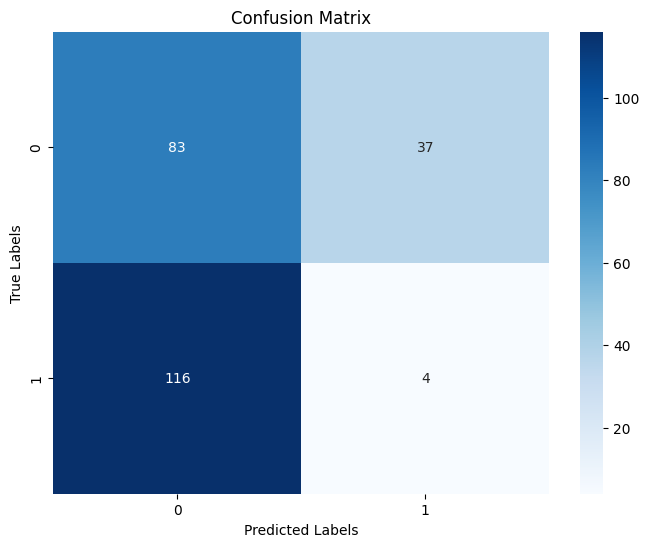

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(df_['relevant'], df_['phi3'])

# Plot the confusion matrix
print(classification_report(df_['relevant'], df_['phi3']))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(r'Confusion Matrix')
plt.show()

Merged Model v1

Relevant = 1s

              precision    recall  f1-score   support

           0       0.64      0.89      0.74       100
           1       0.82      0.50      0.62       100

    accuracy                           0.69       200
   macro avg       0.73      0.70      0.68       200
weighted avg       0.73      0.69      0.68       200



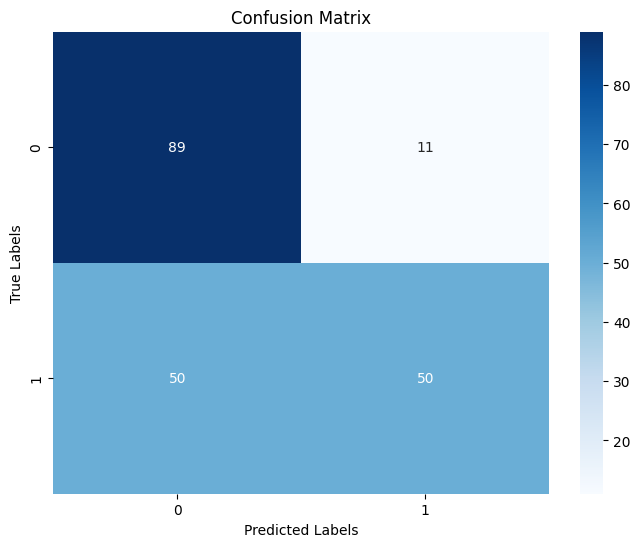

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(df_final['relevant'], df_final['phi3'])

# Plot the confusion matrix
print(classification_report(df_final['relevant'], df_final['phi3']))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(r'Confusion Matrix')
plt.show()

Merged Model v2

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       100
           1       0.76      0.73      0.74       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



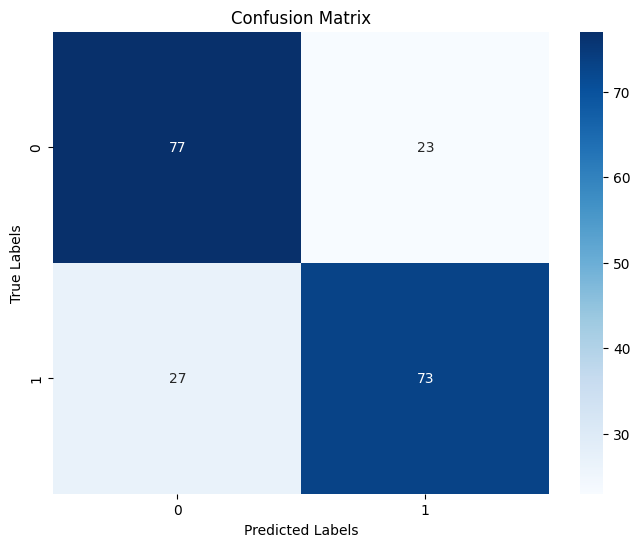

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(df_final['relevant'], df_final['phi3'])

# Plot the confusion matrix
print(classification_report(df_final['relevant'], df_final['phi3']))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(r'Confusion Matrix')
plt.show()